# FLAIR 3D 이미지의 전체 2D 단면 시각화

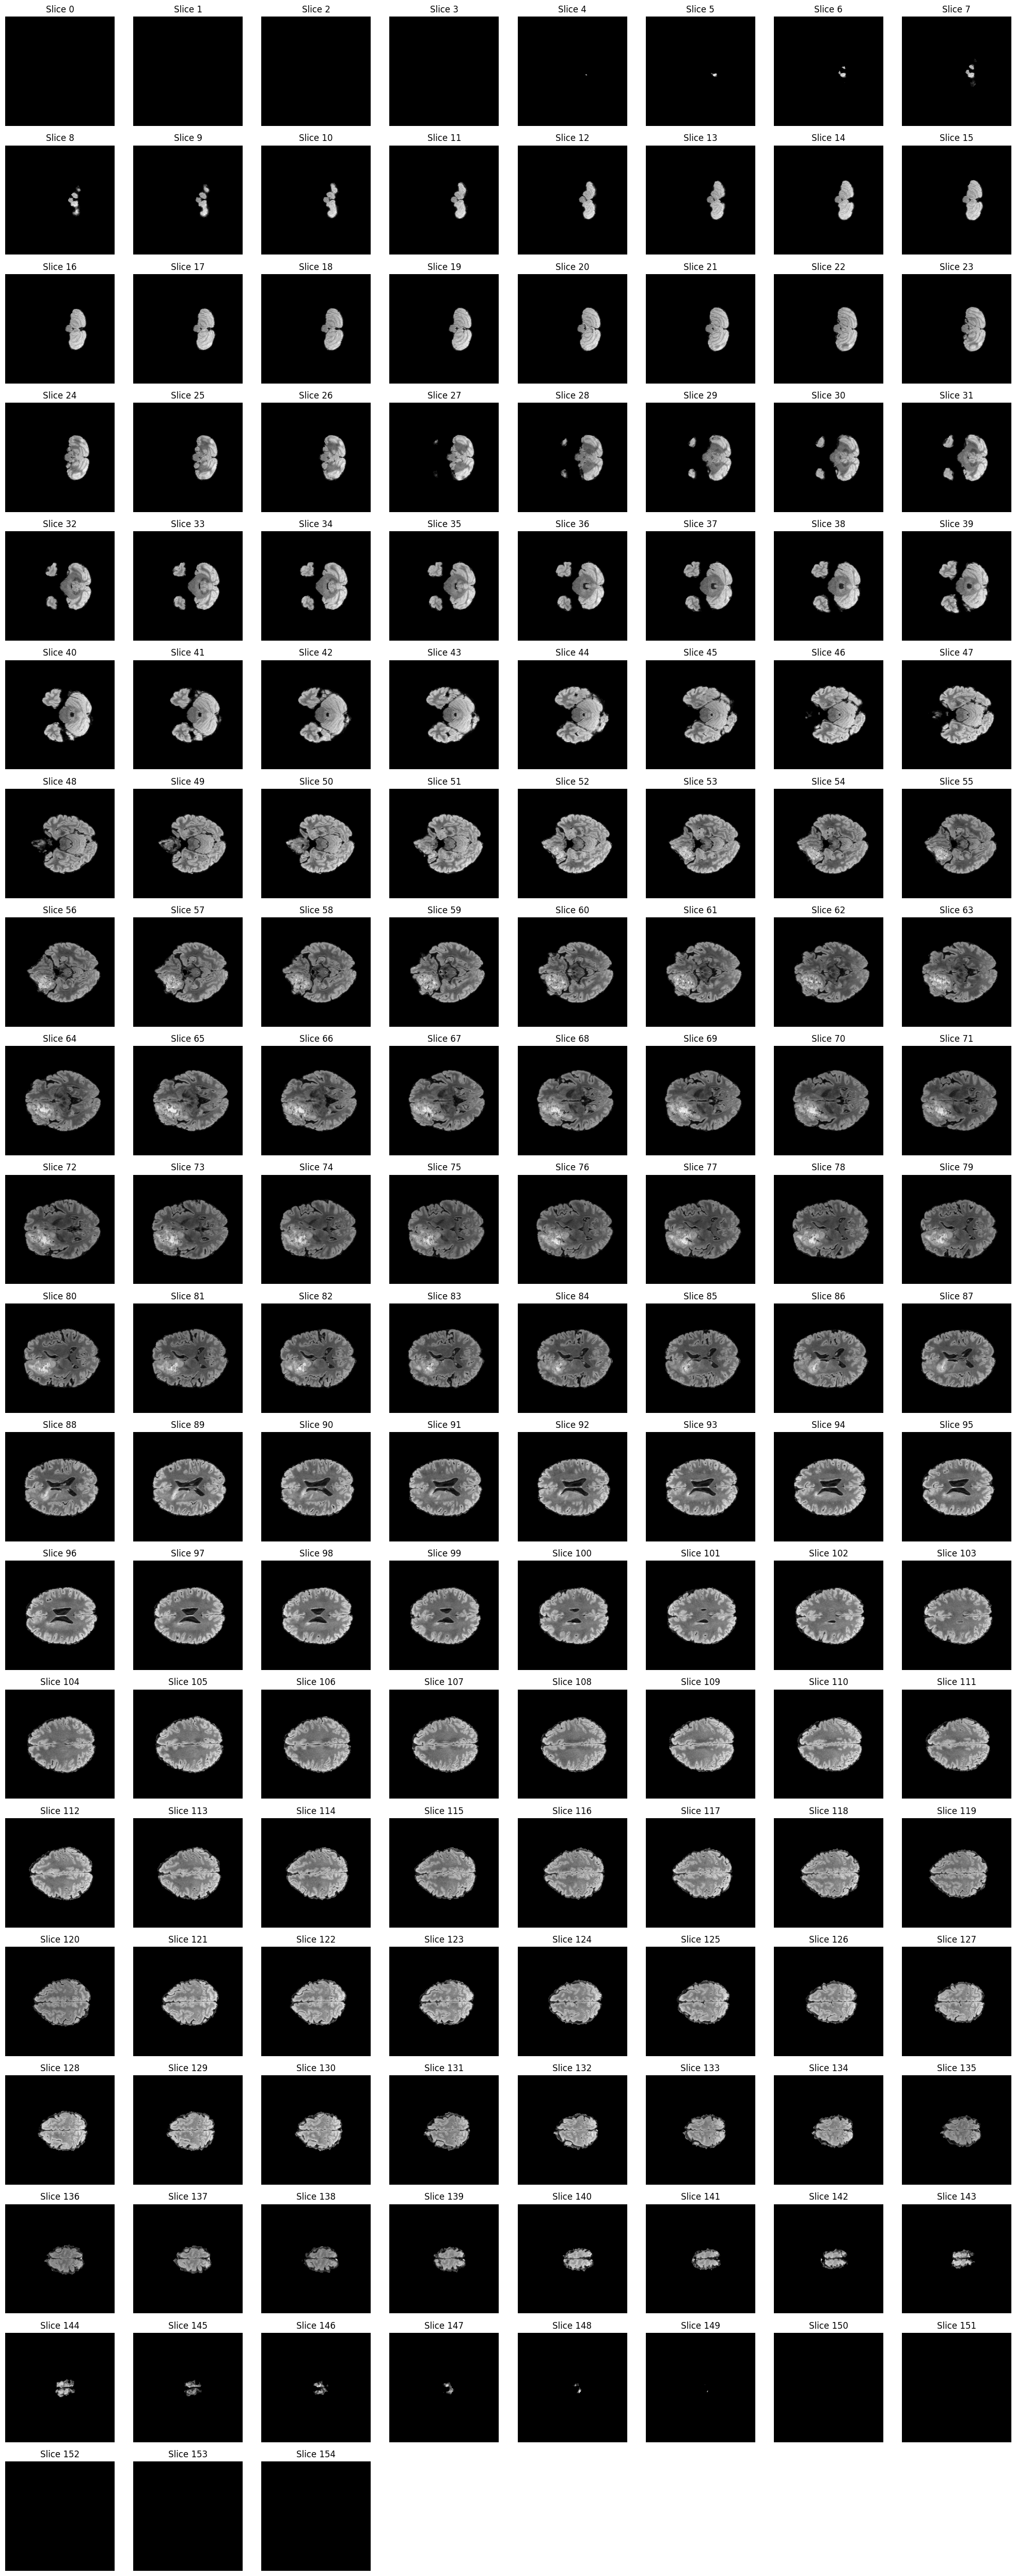

In [1]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

# FLAIR 파일 경로
flair_path = '/mnt/ssd/brain-tumor-prediction/data/raw/BraTS2021_Training_Data/BraTS2021_00000/BraTS2021_00000_flair.nii.gz'

# 데이터 로드 및 numpy로 변환
flair_img = nib.load(flair_path)
flair_data = flair_img.get_fdata()

# 축 방향 설정 (보통 z축 = 마지막 축)
num_slices = flair_data.shape[2]

# 그리드 크기 설정 (예: 8행 x 8열)
cols = 8
rows = int(np.ceil(num_slices / cols))

# 플롯 크기
plt.figure(figsize=(20, 2.5 * rows))

# 모든 슬라이스 시각화
for i in range(num_slices):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(flair_data[:, :, i], cmap='gray')
    plt.axis('off')
    plt.title(f"Slice {i}")

plt.tight_layout()
plt.show()


# T1, T1ce, T2, FLAIR 각각의 중간 단면 시각화

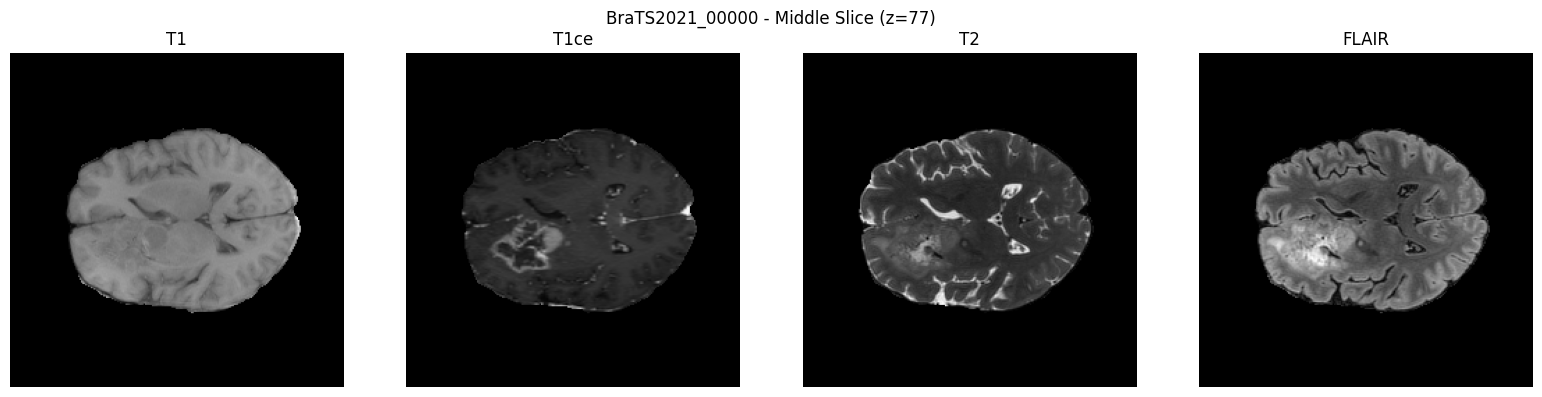

In [2]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

# 환자 ID
patient_id = "BraTS2021_00000"
base_path = f"/mnt/ssd/brain-tumor-prediction/data/raw/BraTS2021_Training_Data/{patient_id}"

# 시퀀스 파일들
modalities = {
    "T1":   f"{base_path}/{patient_id}_t1.nii.gz",
    "T1ce": f"{base_path}/{patient_id}_t1ce.nii.gz",
    "T2":   f"{base_path}/{patient_id}_t2.nii.gz",
    "FLAIR":f"{base_path}/{patient_id}_flair.nii.gz"
}

# 시퀀스 불러오기
images = {}
for name, path in modalities.items():
    img = nib.load(path)
    images[name] = img.get_fdata()

# 공통된 슬라이스 인덱스 선택 (z축 중간)
slice_index = images["FLAIR"].shape[2] // 2

# 시각화
plt.figure(figsize=(16, 4))
for i, (modality, data) in enumerate(images.items()):
    plt.subplot(1, 4, i + 1)
    plt.imshow(data[:, :, slice_index], cmap='gray')
    plt.title(modality)
    plt.axis('off')

plt.suptitle(f"{patient_id} - Middle Slice (z={slice_index})")
plt.tight_layout()
plt.show()


# FLAIR 중간 단면과 Segmentation Mask 시각화

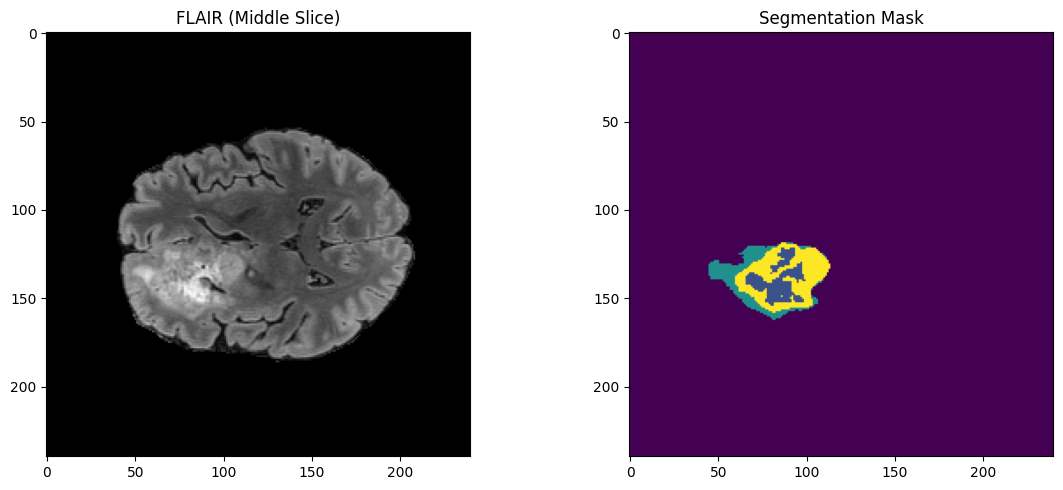

In [3]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

# 환자 1명의 FLAIR 영상과 segmentation 마스크 경로
flair_path = '/mnt/ssd/brain-tumor-prediction/data/raw/BraTS2021_Training_Data/BraTS2021_00000/BraTS2021_00000_flair.nii.gz'
seg_path   = '/mnt/ssd/brain-tumor-prediction/data/raw/BraTS2021_Training_Data/BraTS2021_00000/BraTS2021_00000_seg.nii.gz'

# 데이터 불러오기
flair_img = nib.load(flair_path)
seg_img   = nib.load(seg_path)

flair = flair_img.get_fdata()
seg = seg_img.get_fdata()

# 중간 슬라이스 인덱스
slice_idx = flair.shape[2] // 2

# 시각화
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(flair[:, :, slice_idx], cmap='gray')
plt.title('FLAIR (Middle Slice)')

plt.subplot(1, 2, 2)
plt.imshow(seg[:, :, slice_idx])
plt.title('Segmentation Mask')

plt.tight_layout()
plt.show()


# FLAIR + Segmentation Mask 오버레이 시각화

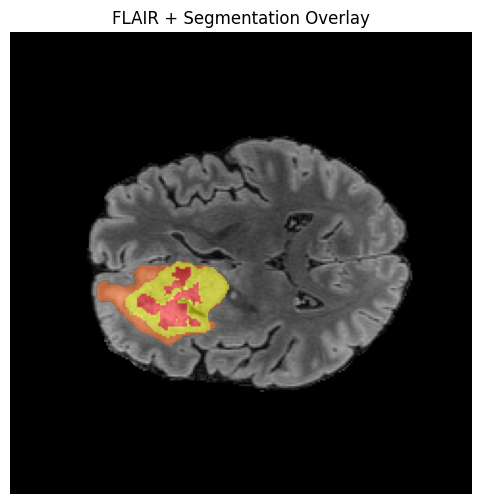

In [8]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

# 경로
flair_path = '/mnt/ssd/brain-tumor-prediction/data/raw/BraTS2021_Training_Data/BraTS2021_00000/BraTS2021_00000_flair.nii.gz'
seg_path   = '/mnt/ssd/brain-tumor-prediction/data/raw/BraTS2021_Training_Data/BraTS2021_00000/BraTS2021_00000_seg.nii.gz'

# 데이터 로딩
flair = nib.load(flair_path).get_fdata()
seg = nib.load(seg_path).get_fdata()

# 중간 슬라이스
slice_idx = flair.shape[2] // 2
flair_slice = flair[:, :, slice_idx]
seg_slice = seg[:, :, slice_idx]

# 시각화 (overlay)
plt.figure(figsize=(8, 6))
plt.imshow(flair_slice, cmap='gray')
plt.imshow(np.ma.masked_where(seg_slice == 0, seg_slice), cmap='autumn', alpha=0.5)
plt.title('FLAIR + Segmentation Overlay')
plt.axis('off')
plt.show()


# BraTS21 샘플 Shape 출력

In [1]:
import os
import nibabel as nib

# 환자 폴더 예시
patient_dir = '/mnt/ssd/brain-tumor-prediction/data/raw/BraTS2021_Training_Data/BraTS2021_00000'

# 각 시퀀스 파일 경로
t1_path    = os.path.join(patient_dir, 'BraTS2021_00000_t1.nii.gz')
t1ce_path  = os.path.join(patient_dir, 'BraTS2021_00000_t1ce.nii.gz')
t2_path    = os.path.join(patient_dir, 'BraTS2021_00000_t2.nii.gz')
flair_path = os.path.join(patient_dir, 'BraTS2021_00000_flair.nii.gz')
seg_path   = os.path.join(patient_dir, 'BraTS2021_00000_seg.nii.gz')

# 파일 불러오기
t1_img    = nib.load(t1_path)
t1ce_img  = nib.load(t1ce_path)
t2_img    = nib.load(t2_path)
flair_img = nib.load(flair_path)
seg_img   = nib.load(seg_path)

# 데이터 가져오기
t1_data    = t1_img.get_fdata()
t1ce_data  = t1ce_img.get_fdata()
t2_data    = t2_img.get_fdata()
flair_data = flair_img.get_fdata()
seg_data   = seg_img.get_fdata()

# Shape 출력
print(f"T1 shape: {t1_data.shape}")
print(f"T1ce shape: {t1ce_data.shape}")
print(f"T2 shape: {t2_data.shape}")
print(f"FLAIR shape: {flair_data.shape}")
print(f"Segmentation shape: {seg_data.shape}")


T1 shape: (240, 240, 155)
T1ce shape: (240, 240, 155)
T2 shape: (240, 240, 155)
FLAIR shape: (240, 240, 155)
Segmentation shape: (240, 240, 155)
